# 應用多變量分析 HW4
### 105024519 許閔翔

In [4]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.plotly as py
from matplotlib.mlab import PCA


In [6]:
# 利用R-package "mice"補上 missing value，
# 但是仍有無法填補的值以及整欄皆為missing value的欄位，所以將其刪除。 
# import complete dataset.

df = pd.read_csv('DATA/anova_com.csv')
del df["Unnamed: 0"]
print('\n Size of original data: \n%s' % df.shape[0])
df = df.dropna(axis = 0)
print('\n Size of dropna data: \n%s' % df.shape[0])



 Size of original data: 
7703

 Size of dropna data: 
6947


## Topic1: Do PCA

In [7]:
### Select Featrues in G3, G4, G5, G6
## Z-normalize data
# Estimate the correlation matrix

X = df.iloc[:100, 7:]
sc = StandardScaler()
Z = sc.fit_transform(X)

C = np.dot(Z.T, Z) / X.shape[0]
eigen_vals, eigen_vecs = np.linalg.eigh(C)
print('\nEigenvalues: \n%s' % eigen_vals)


Eigenvalues: 
[ -1.85198389e-16  -2.97467073e-17   1.09384309e-02   1.15536169e-02
   1.50653917e-02   3.21754374e-02   4.80540295e-02   6.60657188e-02
   8.78438822e-02   1.11196082e-01   2.13998843e-01   2.35259430e-01
   3.79594360e-01   4.05541303e-01   5.58029767e-01   7.70149396e-01
   9.22157219e-01   1.19651515e+00   1.53245527e+00   2.06089804e+00
   4.27479424e+00   9.06771440e+00]


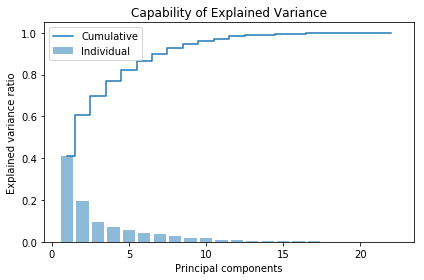

In [8]:
tot = sum(np.abs(eigen_vals))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_vals), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, eigen_vals.size + 1), var_exp, alpha=0.5, align='center',
        label='Individual')
plt.step(range(1, eigen_vals.size + 1), cum_var_exp, where='mid',
         label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

plt.title("Capability of Explained Variance")
plt.tight_layout()
plt.show()


>由上圖可知，如果選擇前兩個主成份去做投影所得到的新資料大概可以代表原本資料的"60%"。

In [10]:
### Make a list of (eigenvalue, eigenvector) tuples
## Sort the (eigenvalue, eigenvector) tuples from high to low
# Calculate projection matrix
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

P = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print 'Peojection matrix P:'
print P


Peojection matrix P:
[[-0.12348726  0.08688065]
 [ 0.1839663   0.33723744]
 [-0.19029407  0.09553675]
 [-0.14281424 -0.34449766]
 [ 0.04533508 -0.24426243]
 [-0.10865841  0.16374512]
 [-0.13823946  0.04704478]
 [-0.28057182  0.21131958]
 [ 0.03603585 -0.39507335]
 [-0.27822181 -0.22799147]
 [-0.14701219  0.02866096]
 [ 0.21950138  0.24251312]
 [ 0.28553878  0.2177183 ]
 [ 0.30222496  0.1167041 ]
 [-0.31109499 -0.0681592 ]
 [ 0.29069537  0.15925735]
 [-0.22862874  0.19216368]
 [-0.21603126  0.3064258 ]
 [ 0.28057182 -0.21131958]
 [-0.13215945  0.22932351]
 [ 0.2059418  -0.12404692]
 [-0.2059418   0.12404692]]


In [11]:
## Project df to PC1 and PC2, dimension reduction(22 >>>>> 2).
# Combine df_categorical and df_numerical_pca to result.

Z_pca = Z.dot(P)
data_cate = df.iloc[:100,:7]
result_pca = pd.DataFrame(np.hstack([ data_cate, Z_pca ]))
result_pca.columns = ["PREDDEG", "HIGHDEG", "CONTROL", 
                  "ST_FIPS", "REGION", "LATITUDE", "LONGITUDE", 
                  "pc1", "pc2"]

print 'PCA Data:'
result_pca.head()


PCA Data:


,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LATITUDE,LONGITUDE,pc1,pc2
0,3.0,4.0,3.0,4.0,6.0,33.402250,-111.966181,-6.678287,2.579147
1,1.0,2.0,1.0,18.0,3.0,39.803753,-86.158213,-2.752622,1.137102
2,2.0,3.0,1.0,12.0,5.0,25.777717,-80.190856,-3.471500,-3.287762
3,2.0,2.0,1.0,48.0,6.0,30.188408,-95.490077,-3.290220,-0.645537
4,2.0,2.0,1.0,48.0,6.0,29.737303,-95.376524,-3.858308,-1.470806


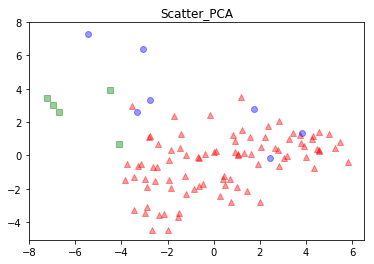

In [12]:
fig, ax = plt.subplots()

data_1 = np.array(result_pca[result_pca.CONTROL == 1])
data_2 = np.array(result_pca[result_pca.CONTROL == 2])
data_3 = np.array(result_pca[result_pca.CONTROL == 3])
ax.scatter(data_1[:, [7]], data_1[:, [8]], color='r', marker='^', alpha=.4)
ax.scatter(data_2[:, [7]], data_2[:, [8]], color='b', alpha=.4)
ax.scatter(data_3[:, [7]], data_3[:, [8]], color='g', marker='s', alpha=.4)
ax.autoscale()

plt.title('Scatter_PCA')
plt.show()


In [13]:
column_name = ["PREDDEG", "HIGHDEG", "CONTROL", 
               "ST_FIPS", "REGION", "LATITUDE", "LONGITUDE",
               "UGDS", 'UG', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI',
               'DEP_STAT_PCT_IND', 'IND_INC_PCT_LO', 'DEP_INC_PCT_LO', 'INC_PCT_M1', 'INC_PCT_M2', 
               'INC_PCT_H1', 'INC_PCT_H2', 
               'PAR_ED_PCT_MS', 'PAR_ED_PCT_HS', 'PAR_ED_PCT_PS',
               'FEMALE', 'MARRIED', 'DEPENDENT', 'VETERAN', 'UGDS_MEN', 'UGDS_WOMEN'
              ]
def biplot(score, coeff, labels = None):
    xs = score[:,0]
    ys = score[:,1]
    n=coeff.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley, color='#4aba5d')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = '#1d21a3', lw = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, column_name[i], color='r', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

plt.figure(figsize = (12, 12))
plt.xlim(-0.75,0.75)
plt.ylim(-0.75,0.75)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title('BiPlot')
plt.grid()


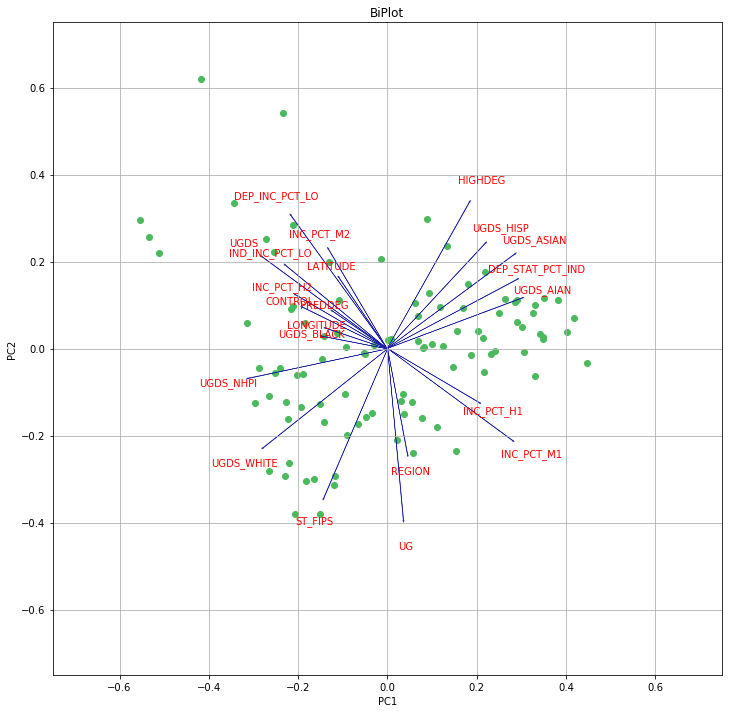

In [14]:
biplot(Z_pca,P)
plt.show()


>此圖可以表示，<br/>
綠色的點，表示前兩個主成分的每一種情况（即大學）的分數，也可以看出某些資料會落在一些軸上，那代表那筆資料本身在那個變數的影像也可以看出某些資料會落在一些軸上，那代表那筆資料本身在那個變數的影響最大。<br/>
淺藍色的線，表示每個變數（numerical features）投影到前兩個主成分的座標與原點連線。<br/>
兩軸分數是原本ＰＣＡ圖形標準化之後的分數。<br/>

>我們假設兩個主成份可以大略代表整筆資料，以提供一個有意義的視覺化表示的結構。<br/>
我們可以藉由點的位置去觀察此點與哪個比較變數相關，也可以利用線之間的角度去看出他們的相關性，<br/>
例如先看最密集的左上角，發現家庭收入中低跟教育程度有很強的關聯，與右下角家庭收入中高成負相關，也是合理的推論，有趣的是學校的種類位置也與其相關性很大，這可以再做更細部的探討。再來看右上角與左下角，白人比例與其他人種的比例承付相關，也是合理的推論。<br/>
當我們拿到一份未處理過的資料時，可以藉由這張圖看出變數的關係，進而將變數分群分類，之後要做features selection的時候會有很大的幫助。